# 📖 Homework: KNN and SVM Implementation  
**Course: Artificial Intelligence**  
**Department of Computer Science**  
**University of South Dakota**  
**Supervisor:** *Dr. Lina Chato*  
**Semester:** *Spring 2025*  

---

## 👨‍🎓 Student Information

| **Student Name**         | **Course Number & Section** |
|--------------------------|-----------------------------|
| Narayan Bhattarai             | CSC 547 UT3                 |
|     Alex Kagozi     | CSC 547 UT3                 |

---


### A.  Wine data classification using SVM


Collab and Github Links

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kagozi/AI-Classification-exercise/blob/main/winedataClassification.ipynb)  
[🔗 [View on GitHub](https://github.com/kagozi/AI-Classification-exercise/blob/main/winedataClassification.ipynb)]

##### 1. Import the libraries

In [1]:
## Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from itertools import cycle
import seaborn as sns

##### 2. Load the dataset

In [2]:
# Load dataset
data = load_wine()
X, y = data.data, data.target
feature_names = data.feature_names

3. Show the unique targets and features:
***************************
_The dataset has 13 features and 3 targets._

In [3]:
## show the target names and the number of unique features and target
print(data.target_names)
print(len(np.unique(y)))
print(len(feature_names))
print(feature_names)

['class_0' 'class_1' 'class_2']
3
13
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


4.  Display the features and labels in tabular format:

In [4]:
# Create a DataFrame with features and target
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display the first 5 rows
print(df.head(5))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

5. Split the dataset (70 % for training and 30% for testing):

In [5]:
# Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

6. Standardize the features:

In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

7. Train the data using an SVM linear Kernel:

In [7]:
# Train Linear SVM Model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

8. Run Predictions on Test data and get the accuracy score:

In [8]:
# Predict on test data
y_pred = svm_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.96


9. Plot a confusion matrix for the dataset:

Confusion Matrix:
[[18  0  0]
 [ 1 20  0]
 [ 0  1 14]]


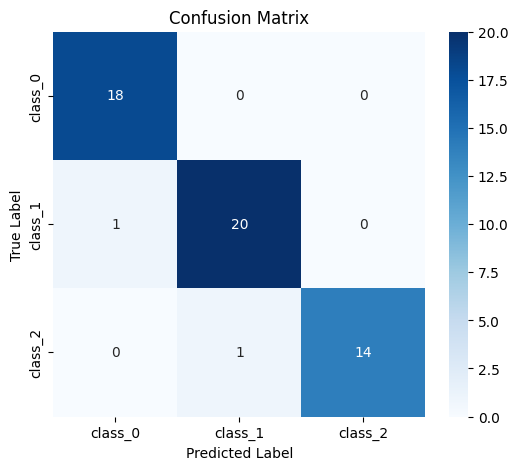

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

10. Print a classification report:

In [10]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC curve and AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_score = svm_model.decision_function(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.95      0.95      0.95        21
           2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



11. Plot a ROC Curve for each class:


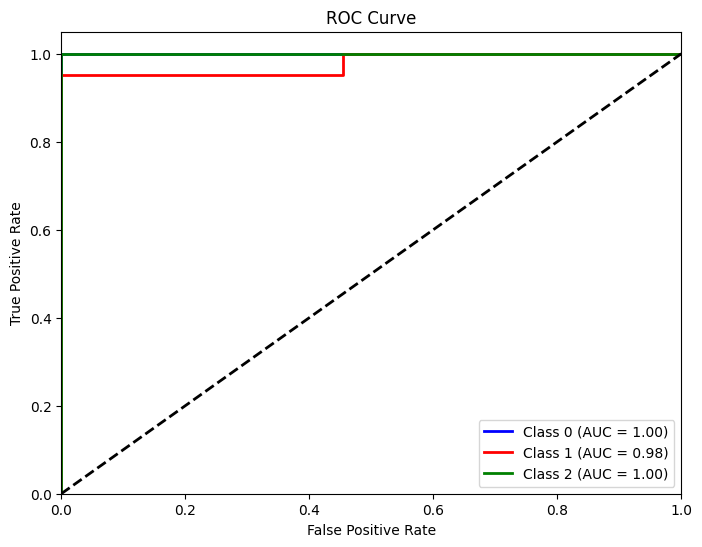

In [11]:
n_classes = len(np.unique(y))

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

12. Test model generalization using 5-Fold Cross-Validation

In [12]:

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.96       0.96       1.         1.         0.95833333]
Mean Cross-Validation Accuracy: 0.98


### B.  Predict Diabetes progression using KNN regression


Collab and Github Links

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kagozi/AI-Classification-exercise/blob/main/DiabetesClassification.ipynb#scrollTo=1WtJS5akJDeL)  
[🔗 [View on GitHub](https://github.com/kagozi/AI-Classification-exercise/blob/main/DiabetesClassification.ipynb)]

1. Import the libraries

In [13]:
## Load dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, mean_squared_error
from itertools import cycle
import seaborn as sns

##### 2. Load the dataset

In [19]:
# Load dataset
# Load dataset
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names

3. Show the unique targets and features:

In [20]:
## show the target names and the number of unique features and target
print("Unique target values (rounded):", len(np.unique(np.round(y))))
print("Number of features:", len(feature_names))
print("Feature names:", feature_names)

Unique target values (rounded): 214
Number of features: 10
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


4. Display the features and labels in tabular format:

In [21]:
# Create DataFrame with features
df = pd.DataFrame(X, columns=feature_names)
# Add target column
df['target'] = y
# Display the first 10 rows
print(df.head(10))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.0

5. Split the dataset (70 % for training and 30% for testing):

In [22]:
# Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 309
Test set size: 133


6. Standardize the features

In [23]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

7. Create a KNN Regression model and fit with train data

In [24]:
# Train KNN Regression Model (K=5)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

8. Run prediction on test data

In [25]:
# Predict on test data
y_pred = knn_model.predict(X_test)

9. Compute the Mean Squared Error

In [26]:
# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3277.74


10. Plot a Residual Scatter Plot

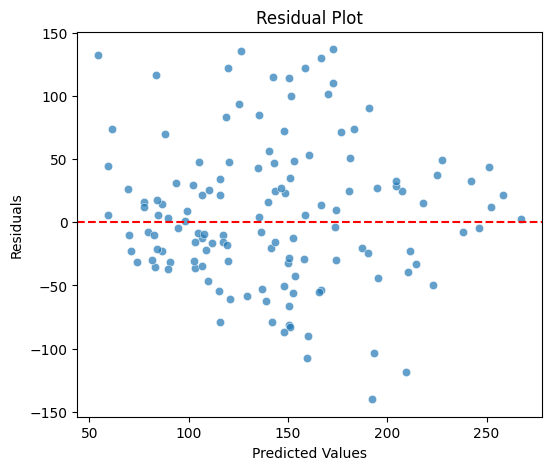

In [27]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

11. Diplay Predicted vs Actual Values on test set

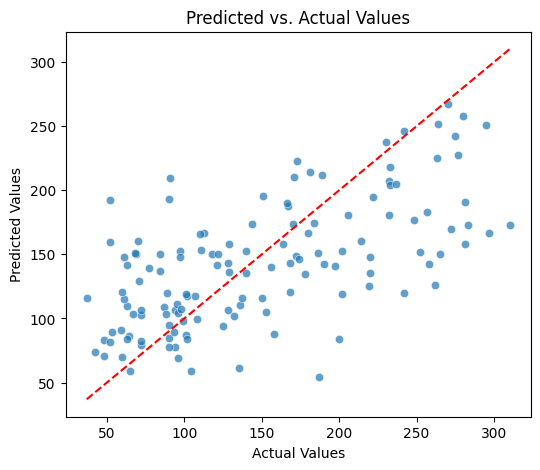

In [28]:
# Predicted vs. Actual Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

12. Calculate the Root Mean Squared Error

In [29]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 57.25


13. Perform 5-Fold Cross-Validation

In [30]:
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Mean Cross-Validation MSE: {cv_mse:.2f}")

Cross-Validation MSE Scores: [3167.19191011 4022.18067416 3556.56681818 3551.07136364 3807.57      ]
Mean Cross-Validation MSE: 3620.92


14. Plot a Histogram of Residuals

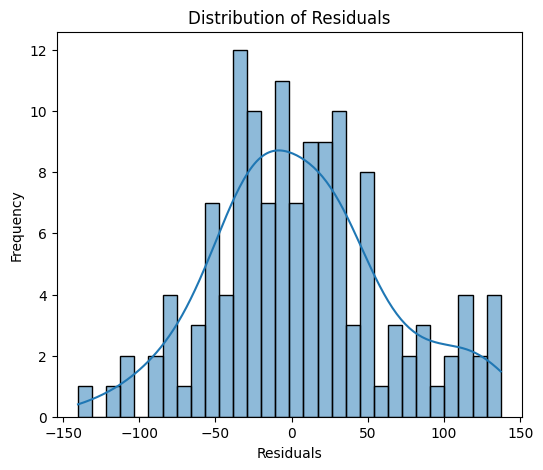

In [31]:
#Histogram of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

15. Show colleration between features and the target

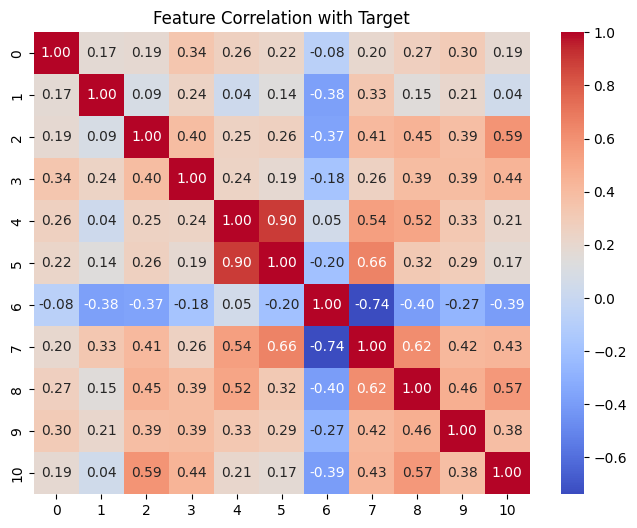

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(np.corrcoef(X.T, y), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()